Data Source: https://data.cityofnewyork.us/Housing-Development/DOB-Permit-Issuance/ipu4-2q9a

## Import Libraries

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import warnings
warnings.filterwarnings('ignore')

import folium
import webbrowser

## Read the Data

In [2]:
df = pd.read_csv("DOB_Permit_Issuance.csv")
df.head()

,BOROUGH,Bin #,House #,Street Name,Job #,Job doc. #,Job Type,Self_Cert,Block,Lot,Community Board,Zip Code,Bldg Type,Residential,Special District 1,Special District 2,Work Type,Permit Status,Filing Status,Permit Type,Permit Sequence #,Permit Subtype,Oil Gas,Site Fill,Filing Date,Issuance Date,Expiration Date,Job Start Date,Permittee's First Name,Permittee's Last Name,Permittee's Business Name,Permittee's Phone #,Permittee's License Type,Permittee's License #,Act as Superintendent,Permittee's Other Title,HIC License,Site Safety Mgr's First Name,Site Safety Mgr's Last Name,Site Safety Mgr Business Name,Superintendent First & Last Name,Superintendent Business Name,Owner's Business Type,Non-Profit,Owner's Business Name,Owner's First Name,Owner's Last Name,Owner's House #,Owner's House Street Name,Owner’s House City,Owner’s House State,Owner’s House Zip Code,Owner's Phone #,DOBRunDate,PERMIT_SI_NO,LATITUDE,LONGITUDE,COUNCIL_DISTRICT,CENSUS_TRACT,NTA_NAME
0,BROOKLYN,3052111,357,JEFFERSON AVENUE,321452432,1,A2,Y,1830,73,303,11221.0,2.0,YES,NaN,NaN,EQ,ISSUED,INITIAL,EQ,1,FN,NaN,NOT APPLICABLE,07/19/2017 12:00:00 AM,03/29/2019 12:00:00 AM,03/28/2020 12:00:00 AM,03/29/2019 12:00:00 AM,RAMESH,KELLY,K&K CONSTRUCTION & IRONW*,5166914851,GC,611437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INDIVIDUAL,N,NaN,ANN,DOUGHER,122,PATCHEN AVENUE,BROOKLYN,NY,11213,7.18454e+09,03/30/2019 12:00:00 AM,3303889,40.684069,-73.943284,36.0,267.0,Bedford
1,BRONX,2007654,1985,CRESTON AVENUE,240209038,1,A2,Y,2807,22,205,10453.0,2.0,YES,NaN,NaN,OT,ISSUED,RENEWAL,EW,3,OT,NaN,NOT APPLICABLE,03/29/2019 12:00:00 AM,03/29/2019 12:00:00 AM,04/01/2020 12:00:00 AM,12/18/2017 12:00:00 AM,ANTHONY,DIGUGLIELMO,NOTIAS CONSTRUCTION INC,7188887679,GC,1714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CORPORATION,Y,1985 CRESTON AVENUE HDFC,FRITZ,JEAN,2003,WALTON AVENUE,BRONX,NY,10453,7.18584e+09,03/30/2019 12:00:00 AM,3611462,40.851002,-73.906428,14.0,241.0,Mount Hope
2,BRONX,2007654,1985,CRESTON AVENUE,240209038,1,A2,Y,2807,22,205,10453.0,2.0,YES,NaN,NaN,MH,ISSUED,RENEWAL,EW,3,MH,NaN,NOT APPLICABLE,03/29/2019 12:00:00 AM,03/29/2019 12:00:00 AM,04/01/2020 12:00:00 AM,12/18/2017 12:00:00 AM,ANTHONY,DIGUGLIELMO,NOTIAS CONSTRUCTION INC,7188887679,GC,1714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CORPORATION,Y,1985 CRESTON AVENUE HDFC,FRITZ,JEAN,2003,WALTON AVENUE,BRONX,NY,10453,7.18584e+09,03/30/2019 12:00:00 AM,3611461,40.851002,-73.906428,14.0,241.0,Mount Hope
3,QUEENS,4050421,62-60,99TH STREET,440531293,1,A2,Y,2086,40,406,11374.0,2.0,YES,NaN,NaN,OT,ISSUED,RENEWAL,EW,2,OT,NaN,NOT APPLICABLE,03/29/2019 12:00:00 AM,03/29/2019 12:00:00 AM,03/28/2020 12:00:00 AM,01/27/2019 12:00:00 AM,CARLOS,PILLCO,CENTRAL FIVE HOME IMPROVE,9173534061,GC,616891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CORPORATION,N,62-60 99TH STREET OWNER II LLC,ALLEN,KONSTAM,825,THIRD AVENUE,NEW YORK,NY,10022,6.46442e+09,03/30/2019 12:00:00 AM,3611460,40.733469,-73.857560,29.0,71701.0,Rego Park
4,BRONX,2007668,2042,MORRIS AVENUE,240209065,1,A2,Y,2807,56,205,10453.0,2.0,YES,NaN,NaN,MH,ISSUED,RENEWAL,EW,3,MH,NaN,NOT APPLICABLE,03/29/2019 12:00:00 AM,03/29/2019 12:00:00 AM,04/01/2020 12:00:00 AM,12/18/2017 12:00:00 AM,ANTHONY,DIGUGLIELMO,NOTIAS CONSTRUCTION INC,7188887679,GC,1714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CORPORATION,Y,"MOUNT HOPE ASSOCIATES, L.P.",FRITZ,JEAN,2003,WALTON AVENUE,BRONX,NY,10453,7.18584e+09,03/30/2019 12:00:00 AM,3611459,40.852966,-73.905756,14.0,241.0,Mount Hope


## Count Number of Rows and Columns

In [3]:
print('Number of rows : {}'.format(df.shape[0]))
print('Number of columns : {}'.format(df.shape[1]))

Number of rows : 3510723
Number of columns : 60


## Exploring the distribution of Job Type

* **Alteration Type 1 (Alt-1)**. An alteration that requires an amended or new Certificate ofOccupancy (C/O). Some examples include: changing the occupancy of a single-family hometo a two-family home, changing the use of a facility from commercial to residential, or changing the egress of the building.


* **Alteration Type 2 (Alt-2)**. An alteration which does not require an amended C/O, but includes multiple work types, such as plumbing and construction, is considered an Alt-2. 


* **Alteration Type 3 (Alt-3)**. An Alt-3 is an alteration that involves one work type such as acurb cut or a construction fence (when such work does not require an amended C/O). In some cases, an Alt-3 application may be filed by an individual who is not a P.E. or R.A. contact your borough office for more information. *NOTE: Only Construction Equipment, Curb Cuts, and Other work types are allowed in an Alt-3 application (including only those work types in 6F)*


* **New Building (NB)**. When an entire new building is being erected, ‘new building’ should be selected. If the job requires the demolition of an existing building, a separate demolition application must be filed. ‘NB’ cannot be selected if any existing building elements are to remain—for example a part of an old foundation, a portion of a façade that will be incorporated into the construction, etc. If any existing building elements will be retained in place as part of the construction, the application must be filed as ‘Alteration Type 1 required to meet New Building Requirements (28-101.4.5)’.


* **Sign (SG)**: A licensed Sign Hanger is required for the installation of signs. There are various types of signs, each of which carry different requirements. Illuminated signs require the permit to be renewed annually. This section does not apply to marquees which are filed as Alt-3. 


* **Full Demolition (DM)**. The dismantling, razing, or removal of all of a building or structure, including all related incidental operations


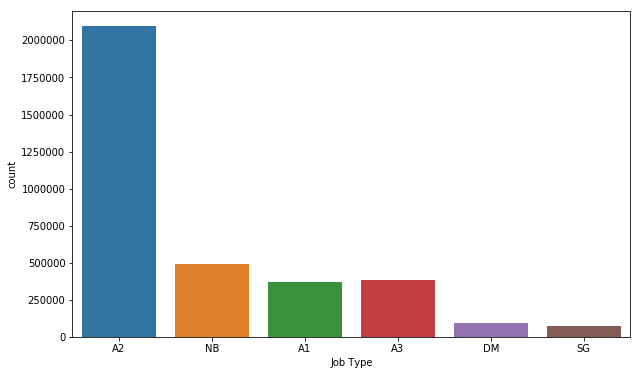

In [4]:
plt.figure(figsize=(10,6))
sns.countplot(df['Job Type'])

* As evident by the plot A2 alterations are most frequent whereas A1 and A3 alterations are less frequent. 
* The number of newly constructed buildings is far greater than the number of buildings demolished.

## Explore the distribution of Work Type

* **EQ** : Construction Equipment
* **OT** : Other (General Construction, Partitions, Marquees, BPP (Builder Pavement Plan), etc.)
* **MH** : Mechanical
* **PL** : Plumbing
* **SP** : Sprinkler
* **FP** : Fire Suppression
* **SD** : Stand Pipe
* **BL** : Boiler
* **FB** : Fuel Burning
* **FS** : Fuel Storage
* **CC** : Curb Cut
* **FA** : Fire Alarm
* **NB** : New Building


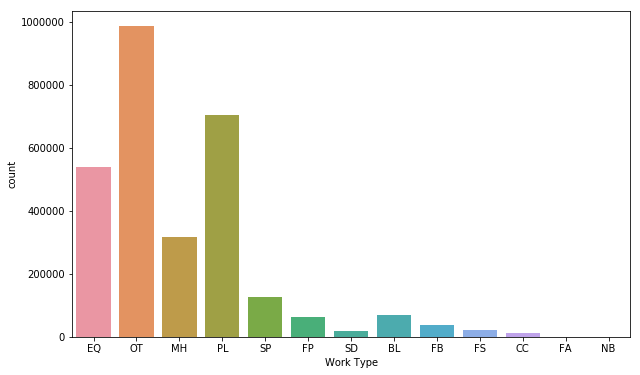

In [5]:
plt.figure(figsize=(10,6))
sns.countplot(df['Work Type'])

* General Construction has occured most frequently followed by Plumbing and Construction Equipment.
* New Building construction and Fire Alarm repairs are the least frequently occuring work types.

## Comparing Building Types

(array([0, 1]), <a list of 2 Text xticklabel objects>)

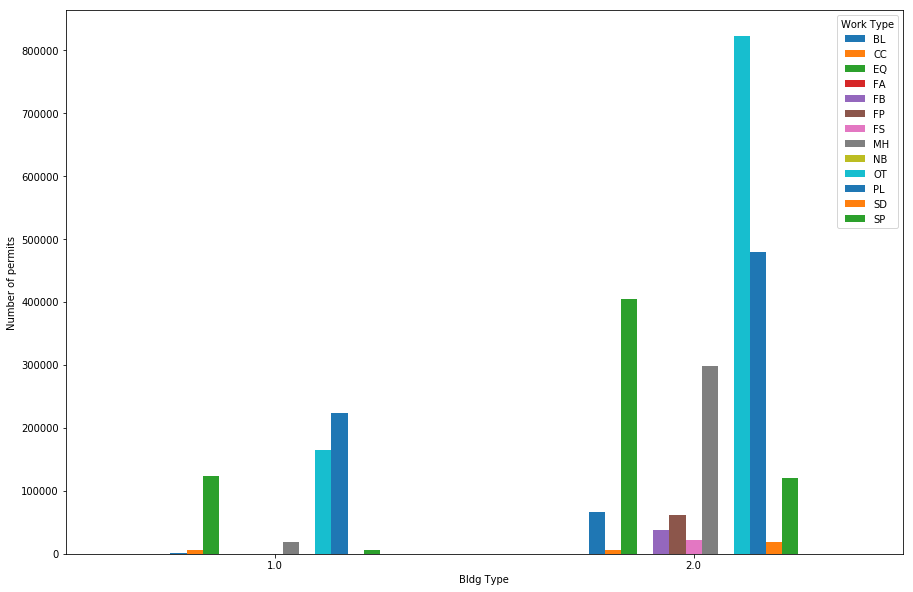

In [148]:
bldg_work_type = pd.crosstab(df['Bldg Type'], df['Work Type'])
fig,ax = plt.subplots(figsize=(15,10))
plt.xlabel("Building Type")
plt.ylabel('Number of permits')
bldg_work_type.plot.bar(ax=ax)
plt.xticks(rotation=0)

* It is evident that 1-Family has very few permits to be issued and the most frequent permits aare for Plumbing and General   Construction, Partitions etc.
* For 2-Family, most frequent permits issuance is for Other aand contruction equipment and plumbing etc.

## Explore Permit Issuance by Boroughs

Text(0.5, 1.0, 'Number of permits issued across each Borough')

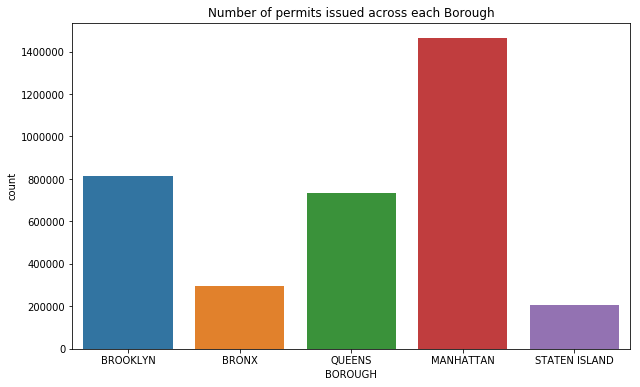

In [6]:
plt.figure(figsize=(10,6))
sns.countplot(df['BOROUGH'])
plt.title('Number of permits issued across each Borough')

* Most number of permits have been issued in Manhattan
* Least number of permits have been issued in Staten Island

## Compare Job Type Distribution accross boroughs

In [7]:
boro_job_type = pd.crosstab(df['BOROUGH'], df['Job Type'])
boro_job_type

Job Type,A1,A2,A3,DM,NB,SG
BOROUGH,,,,,,
BRONX,25922,153203,36837,7805,64933,8012
BROOKLYN,117432,418106,86577,29012,148919,14685
MANHATTAN,78787,1130155,183968,10170,29603,30381
QUEENS,125920,332528,67368,30929,157116,17877
STATEN ISLAND,23639,62233,10168,12169,91496,4773


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

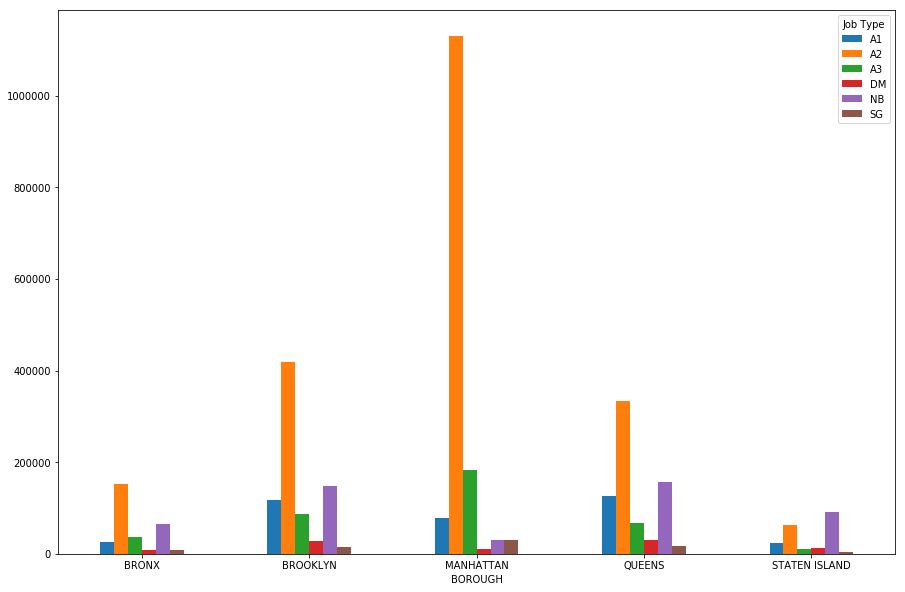

In [19]:
fig,ax = plt.subplots(figsize=(15,10))
boro_job_type.plot.bar(ax=ax)
plt.xticks(rotation=0)

## Explore permit Issuanace date across boroughs

In [32]:
df['Filing Date'] = pd.to_datetime(df['Filing Date'])
df['Issuance Date'] = pd.to_datetime(df['Issuance Date'])
df['Job Start Date'] = pd.to_datetime(df['Job Start Date'], errors='coerce')
df['Expiration Date'] = pd.to_datetime(df['Expiration Date'], errors='coerce')

Text(0, 0.5, 'Number of permits Issued')

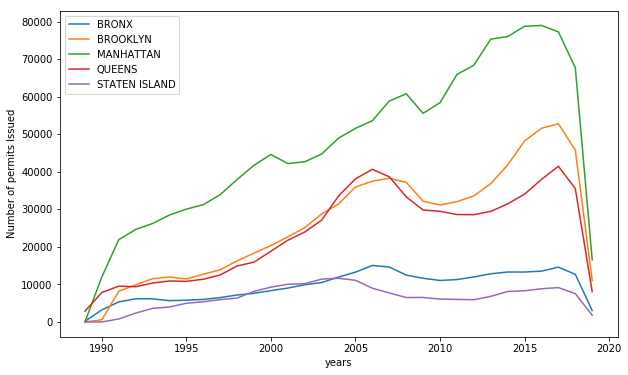

In [41]:
df['issue_year'] = df['Issuance Date'].dt.year
df['issue_month'] = df['Issuance Date'].dt.month

boro_issue_year = pd.crosstab(df['issue_year'], df['BOROUGH'])

plt.figure(figsize=(10,6))
for col in boro_issue_year.columns:
    plt.plot(boro_issue_year[col], label=col)
plt.legend()
plt.xlabel('years')
plt.ylabel('Number of permits Issued')

* Upto 2008 all boroughs witnessed an increase in the number of permits issued. 
* However, in 2008 all boroughs witnessed a slight dip in the number of permits issued. This might be due to the economic recession that hit United States. 
* As evident by the plot, the number of permits issued in recent times have also decreased.

### Upon closer investigation it was found the many jobs started before a permit is actually issued. Lets explore all such jobs

937414 number of jobs started before a valid permit was issued for them


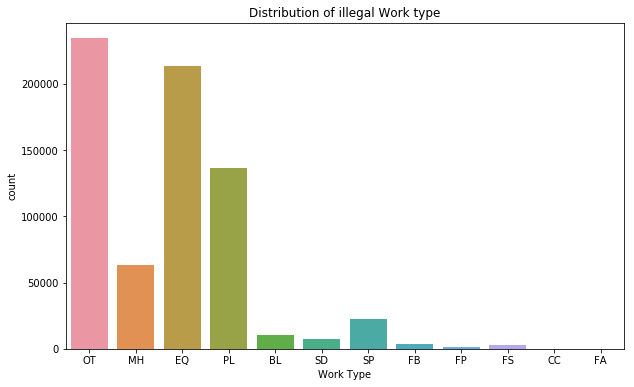

In [53]:
illegal_work = df[df['Issuance Date'] > df['Job Start Date']]['Work Type']
plt.figure(figsize=(10,6))
sns.countplot(illegal_work)
plt.title('Distribution of illegal Work type')
print('{} number of jobs started before a valid permit was issued for them'.format(illegal_work.shape[0]))

General construction work, plumbling and construction equipment are among the most frequently performed illegal work type.

## Visualising Work Type By zip codes

In [72]:
# Delete rows with zip code=0
df = df[df['Zip Code']!=0]
# Taking the mean of latitude and longitudes for each zip code
lat = df.groupby('Zip Code').agg(np.mean)['LATITUDE']
lon = df.groupby('Zip Code').agg(np.mean)['LONGITUDE']

In [157]:
df_zip_code = pd.crosstab(df['Zip Code'], df['Work Type'])
df_zip_code['lat'] = lat
df_zip_code['lon'] = lon
df_zip_code.dropna(inplace=True)

In [158]:
df_zip_code['total_work_done'] = df_zip_code.apply(lambda x : sum(x[:13]), axis=1)
df_zip_code['total_work_q'] = pd.qcut(df_zip_code['total_work_done'],4, labels=False)
df_zip_code['zip_code'] = df_zip_code.index
df_zip_code.reset_index(drop=True, inplace=True)



In [159]:
latitude = 40.730610
longitude = -73.935242
nyc_map = folium.Map(location=[latitude, longitude], zoom_start=15)
colordict = {0: 'lightblue', 1: 'lightpink', 2: 'orange', 3: 'red'}

In [160]:
def plot_map(row):
    
    folium.CircleMarker(
        [row['lat'], row['lon']],

        popup = ('zip code: ' + str(row['zip_code']) + '<br>'
                 'BL: ' + str(row['BL']) + '<br>'
                 'CC: ' + str(row['CC']) + '<br>'
                 'EQ: ' + str(row['EQ']) + '<br>'
                 'FA: ' + str(row['FA']) + '<br>'
                 'FB: ' + str(row['FB']) + '<br>'
                 'FP: ' + str(row['FP']) + '<br>'
                 'FS: ' + str(row['FS']) + '<br>'
                 'MH: ' + str(row['MH']) + '<br>'
                 'NB: ' + str(row['NB']) + '<br>'
                 'OT: ' + str(row['OT']) + '<br>'
                 'PL: ' + str(row['PL']) + '<br>'
                 'SD: ' + str(row['SD']) + '<br>'
                 'SP: ' + str(row['SP']) + '<br>'
                ),
#         color='b',
#         key_on = row['total_work_q'],
#         threshold_scale=[0,1,2,3],
        tooltip = 'Click Me!',
        fill_color=colordict[row['total_work_q']],
        fill=True,
        fill_opacity=0.7
        ).add_to(nyc_map)

In [161]:
df_zip_code.apply(plot_map, axis=1)
nyc_map

#### Map shows the total number of permits issuance and work type for every Zip code. 
### Colors Coding:
* **Red**: Large number of permits issued
* **Orange**: Considerable number of permitd issued
* **Light Pink**: Few number of permits issued
* **Light Blue**: Very few number of permits issued